In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/home/pawan/Questionnaire_new_version.csv")

In [3]:
data

,Documents,file_name,Text,Ground_Truth
0,document1,Nacaps-W1_questionnaire,"""Die Hochschule, an der Sie im Dezember 2018 z...","'wissenschaftssystem', 'betreuung', 'wissensch..."
1,document2,WeGe_W2,"""Wie ist dieser studienvorbereitende Kurs verl...","'integration', 'geflüchtete', 'studienkolleg',..."
2,document3,StuMa2020,"""Welchen Studienabschluss haben Sie in Ihrem l...","'beruflicher verbleib von exmatrikulierten', '..."
3,document4,Studierdenensurvey2016,"""An welcher Art Hochschule studieren Sie. Univ...","'evaluation', 'qualifikation', 'effizienz', 's..."
4,document5,Absolventen_2009.2_Haupt,"""Wie würden Sie Ihre derzeitige Tätigkeit bzw....",'hochschulforschung'
5,document6,Promopanel_W4,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'..."
6,document7,Studienberechtigte_2008.3,"""Wie zufrieden sind Sie mit Ihrem bisherigen B...","'studienberechtigte', 'hochschulforschung'"
7,document8,Wissenschaftlerbefragung2016,"""In welcher Sprache möchten Sie die Befragung ...",'hochschulforschung'
8,document9,Promopanel_W3,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'..."
9,document10,Sozialerhebung20,"""Welchen Abschluss streben Sie in Ihrem derzei...",'hochschulforschung'


In [4]:
GT_within_text = [['wissenschaftssystem', 'betreuung', 'wissenschaftliche karriere', 'vereinbarkeit von familie und beruf', 'promovierende', 'promotion', 'finanzierung', 'mobilität', 'gesundheit'],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['masterstudium'],
 ['evaluation', 'qualifikation', 'studiensituation'],
 [''],
 ['promotion', 'arbeitsbedingungen','wissenschaftliche aktivitäten','weiterbildung', 'auslandsaufenthalt'],
 [''],
 [''],
 ['promotion', 'arbeitsbedingungen','wissenschaftliche aktivitäten', 'weiterbildung', 'auslandsaufenthalt'],
 [''],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['promotion', 'arbeitsbedingungen', 'weiterbildung','wissenschaftliche aktivitäten', 'auslandsaufenthalt', 'gesundheit'],
 ['digitale lehre', 'wohnsituation', 'finanzielle situation', 'studiensituation', 'corona'],
 ['promotion', 'arbeitsbedingungen', 'weiterbildung', 'auslandsaufenthalt'],
 [''],
 [''],
 [''],
 [''],
 ['']]

In [5]:
GT_within_text[0]

['wissenschaftssystem',
 'betreuung',
 'wissenschaftliche karriere',
 'vereinbarkeit von familie und beruf',
 'promovierende',
 'promotion',
 'finanzierung',
 'mobilität',
 'gesundheit']

In [6]:
only_keywords = []
for i in range(len(GT_within_text)):
    only_keywords.append([])
    for j in range(len(GT_within_text[i])):
        if len(GT_within_text[i][j].split(" ")) == 1:
            only_keywords[i].append(GT_within_text[i][j])

In [7]:
only_keywords[0]

['wissenschaftssystem',
 'betreuung',
 'promovierende',
 'promotion',
 'finanzierung',
 'mobilität',
 'gesundheit']

In [8]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import pickle
import sklearn
import numpy as np
import nltk 

nltk.download('punkt')
nltk.download('stopwords')

# stemmer = SnowballStemmer("german")

[nltk_data] Downloading package punkt to /home/pawan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pawan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
stop_words = stopwords.words('german')
stop_words
print(len(stop_words))
stop_words.extend(["a","ab","können","bzw", "usw","eu","wiwi","soz", "nah","dsh","and","eng","wahr", "kfz", "kiel", "öl", "fil" "sose", "ha","wi", "übt","wis","vwl","geben", "hhu","bitte","inkl", "läuft", "ggf", "ern", "te", "edv", "un","ver", "finno", "etc","ehe","kfw", "maße", "möchten", "cau", "juni", "uds", "innen", "aber","ach","acht","achte","achten","achter","achtes","ag","alle","fh","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","außer","ausserdem","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","üben","besten","bin","sein","können","bis","bisher","bist","c","d","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darüber","darum","darunter","das","dasein","daselbst","dass","daß","dasselbe","davon","davor","dazu","dazwischen","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","saarlandes","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","d.h","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","dürfen","dürft","durfte","durften","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","Ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","f","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","groß","grosse","große","grossen","großen","grosser","großer","grosses","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hätte","hatten","hätten","heisst","her","heute","hier","hin","hinter","hoch","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","können","könnt","konnte","könnte","konnten","kurz","l",
                   "lang","lange","leicht","leide","lieber","los","m","inn","usw ","dfg","machen", "erc","macht","machte","mag","magst","mahn","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","möchte","mochten","düsseldorf","mögen","möglich","mögt","morgen","muss","muß","müssen","musst","müsst","musste","mussten","n","na","nach","pogs","vater","mutter","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","Ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","Schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollte","sollten","sondern","sonst","sowie","später","statt","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","über","überhaupt","übrigens","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","vor","w","wahr?","während","währenddem","währenddessen","wann","war","wäre","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","wessen","wie","wieder","will","willst","wir","wird","wirklich","wirst","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","würde","wurden","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","euer","eure","hattest","hattet","jedes","mußt","müßt","sollst","sollt","soweit","weshalb","wieso","woher","wohin"])
print(len(stop_words))

232
877


In [10]:
def clean_text(text, for_embedding=False):
    """
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
#     if for_embedding:
        # Keep punctuation
#         RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
#         RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            word for word in words_tokens_lower if word not in stop_words
        ] 

    text_clean = " ".join(words_filtered)
    return text_clean

In [11]:
# def clean_text(text, for_embedding=False):
#     """
#         - remove any html tags (< /br> often found)
#         - Keep only ASCII + European Chars and whitespace, no digits
#         - remove single letter chars
#         - convert all whitespaces (tabs etc.) to single wspace
#         if not for embedding (but e.g. tdf-idf):
#         - all lowercase
#         - remove stopwords, punctuation and stemm
#     """
#     RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
#     RE_TAGS = re.compile(r"<[^>]+>")
#     RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
#     RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
#     if for_embedding:
#          #Keep punctuation
#         RE_ASCII = re.compile(r"[^A-Za-zÀ-ž.! ]", re.IGNORECASE)
#         RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž.!?]\b", re.IGNORECASE)

#     text = re.sub(RE_TAGS, " ", text)
#     text = re.sub(RE_ASCII, " ", text)
#     text = re.sub(RE_SINGLECHAR, " ", text)
#     text = re.sub(RE_WSPACE, " ", text)

#     word_tokens = word_tokenize(text)
#     words_tokens_lower = [word.lower() for word in word_tokens]

#     if for_embedding:
#         # no stemming, lowering and punctuation / stop words removal
#         words_filtered = word_tokens
#     else:
#         words_filtered = [
#             word for word in words_tokens_lower if word not in stop_words
#         ] 

#     text_clean = " ".join(words_filtered)
#     return text_clean

In [12]:
data["clean_text"] = data["Text"].map(
    lambda x: clean_text(x, for_embedding=True) if isinstance(x, str) else x
)

In [13]:
data["clean_text"][0]

'Die Hochschule an der Sie im Dezember zur Promotion registriert waren hat ebenfalls Interesse daran mehr über die Promotionsbedingungen ihrer Promovierenden zu erfahren Um Doppelbefragungen zu vermeiden möchten wir die von Ihnen innerhalb dieses Fragebogens angegebenen Antworten an Ihre Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung Ihr Einverständnis vorausgesetzt weiter geben Ja ich bin mit der Weitergabe meiner Angaben an die Hochschule einverstanden Nein ich bin mit der Weitergabe meiner Angaben an die Hochschule nicht einverstanden Anfang Dezember waren Sie an Ihrer Hochschule offiziell als Doktorand in registriert In der Zwischenzeit kann sich daran etwas geändert haben Bitte geben Sie an was aktuell auf Sie zutrifft Ich promoviere Ich habe das Promotionsverfahren abgeschlossen Ich habe mein Promotionsvorhaben unterbrochen Ich habe mein Promotionsvorhaben abgebrochen Handelt es sich um eine offiziell der Hochschule gemeldete Unter

In [14]:
data["clean_text_wo_sw"] = data["Text"].map(
    lambda x: clean_text(x, for_embedding=False) if isinstance(x, str) else x
)

In [15]:
data["clean_text_wo_sw"][0]

'hochschule dezember promotion registriert ebenfalls interesse promotionsbedingungen promovierenden erfahren doppelbefragungen vermeiden innerhalb fragebogens angegebenen antworten hochschule zweck qualitätssicherung evaluation bereich doktorandenausbildung einverständnis vorausgesetzt weitergabe angaben hochschule einverstanden weitergabe angaben hochschule einverstanden anfang dezember hochschule offiziell doktorand registriert zwischenzeit geändert aktuell zutrifft promoviere promotionsverfahren abgeschlossen promotionsvorhaben unterbrochen promotionsvorhaben abgebrochen handelt offiziell hochschule gemeldete unterbrechung erinnern quartal arbeiten begonnen erinnern quartal zugelassen quartal quartal quartal quartal hochschule informiert promotion abgebrochen erinnern quartal promotion abgebrochen quartal quartal quartal quartal promotionsverfahren hochschule ausland beteiligt handelt gemeinsamen abschluss hochschulen ausland cotutelle de thèse promotionsverfahren fachhochschule hoc

In [16]:
Preprocesed_text = []
for i in range(len(data["clean_text"])):
    Preprocesed_text.append(re.sub(r'\s([?.!"](?:\s|$))', r'\1', data["clean_text"][i]))  

In [17]:
import re
test_text = []
for i in range(len(Preprocesed_text)):
    test_text.append(re.sub(r'\.+ ', ".",  Preprocesed_text[i]))

In [18]:
cleaned_text = []
for i in range(len(test_text)):
    for line in test_text[i].split('\n'):
        # Replace multiple dots with space
        line = re.sub('\.\.+', '.', line) 
        # Remove single dots
        cleaned_text.append(re.sub('\.', '.', line))

In [19]:
final_cleaned_text = []
for i in range(len(cleaned_text)):
    final_cleaned_text.append(re.sub(r"\.(?=\S)", ". ", cleaned_text[i]))

In [20]:
data['final_cleaned_text'] = final_cleaned_text

In [21]:
data['final_cleaned_text'][0]

'Die Hochschule an der Sie im Dezember zur Promotion registriert waren hat ebenfalls Interesse daran mehr über die Promotionsbedingungen ihrer Promovierenden zu erfahren Um Doppelbefragungen zu vermeiden möchten wir die von Ihnen innerhalb dieses Fragebogens angegebenen Antworten an Ihre Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung Ihr Einverständnis vorausgesetzt weiter geben Ja ich bin mit der Weitergabe meiner Angaben an die Hochschule einverstanden Nein ich bin mit der Weitergabe meiner Angaben an die Hochschule nicht einverstanden Anfang Dezember waren Sie an Ihrer Hochschule offiziell als Doktorand in registriert In der Zwischenzeit kann sich daran etwas geändert haben Bitte geben Sie an was aktuell auf Sie zutrifft Ich promoviere Ich habe das Promotionsverfahren abgeschlossen Ich habe mein Promotionsvorhaben unterbrochen Ich habe mein Promotionsvorhaben abgebrochen Handelt es sich um eine offiziell der Hochschule gemeldete Unter

In [22]:
import spacy
nlp = spacy.load('de_core_news_lg')

In [23]:
#using spacy model for POS tagging

Extracted_Noun_Adjectives=[]  # can change it to Extracted_Noun
for i in range(len(data["clean_text"])):
    Extracted_Noun_Adjectives.append([])
    doc = nlp(data["clean_text"][i])
    for t in doc:
        tag=t.pos_
        if tag =="NOUN" or tag == "ADJ" or tag == 'VERB': # for Noun, only "NOUN"
            if t.text not in Extracted_Noun_Adjectives:
                Extracted_Noun_Adjectives[i].append((t.text, t.pos_))  #for appending to it as a tuples: constructing a tuple   

In [24]:
Extracted_Noun_Adjectives[0]

[('Hochschule', 'NOUN'),
 ('Dezember', 'NOUN'),
 ('Promotion', 'NOUN'),
 ('registriert', 'VERB'),
 ('Interesse', 'NOUN'),
 ('Promotionsbedingungen', 'NOUN'),
 ('Promovierenden', 'NOUN'),
 ('erfahren', 'VERB'),
 ('Doppelbefragungen', 'NOUN'),
 ('vermeiden', 'VERB'),
 ('Fragebogens', 'NOUN'),
 ('angegebenen', 'ADJ'),
 ('Antworten', 'NOUN'),
 ('Hochschule', 'NOUN'),
 ('Zweck', 'NOUN'),
 ('Qualitätssicherung', 'NOUN'),
 ('Evaluation', 'NOUN'),
 ('Bereich', 'NOUN'),
 ('Doktorandenausbildung', 'NOUN'),
 ('Einverständnis', 'NOUN'),
 ('vorausgesetzt', 'VERB'),
 ('geben', 'VERB'),
 ('Weitergabe', 'NOUN'),
 ('Angaben', 'NOUN'),
 ('Hochschule', 'NOUN'),
 ('Nein', 'VERB'),
 ('Weitergabe', 'NOUN'),
 ('Angaben', 'NOUN'),
 ('Hochschule', 'NOUN'),
 ('Anfang', 'NOUN'),
 ('Dezember', 'NOUN'),
 ('Hochschule', 'NOUN'),
 ('Doktorand', 'NOUN'),
 ('Zwischenzeit', 'NOUN'),
 ('geändert', 'VERB'),
 ('Bitte', 'NOUN'),
 ('geben', 'VERB'),
 ('zutrifft', 'VERB'),
 ('promoviere', 'VERB'),
 ('Promotionsverfahren', 'N

In [25]:
#lemmatization on POS tagged text using GermaLemma

from germalemma import GermaLemma

lemmatizer = GermaLemma()

lemmatized_words = []

for i in range(len(Extracted_Noun_Adjectives)):  #can change it to Extracted_Noun
    lemmatized_words.append([])
    for j in range(len(Extracted_Noun_Adjectives[i])): 
            lemmatized_words[i].append(lemmatizer.find_lemma(Extracted_Noun_Adjectives[i][j][0], Extracted_Noun_Adjectives[i][j][1]))

In [26]:
lemmatized_words[0]

['Hochschule',
 'Dezember',
 'Promotion',
 'registrieren',
 'Interesse',
 'Promotionsbedingung',
 'Promovierenden',
 'erfahren',
 'Doppelbefragung',
 'vermeiden',
 'Fragebogen',
 'angegeben',
 'Antwort',
 'Hochschule',
 'Zweck',
 'Qualitätssicherung',
 'Evaluation',
 'Bereich',
 'Doktorandenausbildung',
 'Einverständnis',
 'voraussetzen',
 'geben',
 'Weitergabe',
 'Angabe',
 'Hochschule',
 'neinen',
 'Weitergabe',
 'Angabe',
 'Hochschule',
 'Anfang',
 'Dezember',
 'Hochschule',
 'Doktorand',
 'Zwischenzeit',
 'ändern',
 'Bitte',
 'geben',
 'zutreffen',
 'promovieren',
 'Promotionsverfahren',
 'abschließen',
 'Promotionsvorhaben',
 'unterbrechen',
 'Promotionsvorhaben',
 'abbrechen',
 'handeln',
 'Hochschule',
 'gemeldet',
 'Unterbrechung',
 'Ja',
 'erinnern',
 'welch',
 'Quartal',
 'Arbeit',
 'beginnen',
 'erinnern',
 'welch',
 'Quartal',
 'zulassen',
 'Quartal',
 'Quartal',
 'Quartal',
 'Quartal',
 'Hochschule',
 'informieren',
 'Promotion',
 'abbrechen',
 'erinnern',
 'welch',
 'Quar

In [27]:
# converting the list of tokens into string
lemmatized_corpus = [' '.join(x) for x in lemmatized_words]
print(lemmatized_corpus[0]) 

Hochschule Dezember Promotion registrieren Interesse Promotionsbedingung Promovierenden erfahren Doppelbefragung vermeiden Fragebogen angegeben Antwort Hochschule Zweck Qualitätssicherung Evaluation Bereich Doktorandenausbildung Einverständnis voraussetzen geben Weitergabe Angabe Hochschule neinen Weitergabe Angabe Hochschule Anfang Dezember Hochschule Doktorand Zwischenzeit ändern Bitte geben zutreffen promovieren Promotionsverfahren abschließen Promotionsvorhaben unterbrechen Promotionsvorhaben abbrechen handeln Hochschule gemeldet Unterbrechung Ja erinnern welch Quartal Arbeit beginnen erinnern welch Quartal zulassen Quartal Quartal Quartal Quartal Hochschule informieren Promotion abbrechen erinnern welch Quartal Promotion abbrechen Quartal Quartal Quartal Quartal Promotionsverfahren Hochschule Ausland beteiligen Ja handeln gemeinsam Abschluss Hochschule In Ausland Ja Promotionsverfahren Fachhochschule Hochschule angewandt Wissenschaft beteiligen letzter Jahr Universität wissenschaf

In [28]:
#adding column to the dataframe
data['clean_text_w_lemma']= lemmatized_corpus

In [29]:
data['clean_text_w_lemma'][0]

'Hochschule Dezember Promotion registrieren Interesse Promotionsbedingung Promovierenden erfahren Doppelbefragung vermeiden Fragebogen angegeben Antwort Hochschule Zweck Qualitätssicherung Evaluation Bereich Doktorandenausbildung Einverständnis voraussetzen geben Weitergabe Angabe Hochschule neinen Weitergabe Angabe Hochschule Anfang Dezember Hochschule Doktorand Zwischenzeit ändern Bitte geben zutreffen promovieren Promotionsverfahren abschließen Promotionsvorhaben unterbrechen Promotionsvorhaben abbrechen handeln Hochschule gemeldet Unterbrechung Ja erinnern welch Quartal Arbeit beginnen erinnern welch Quartal zulassen Quartal Quartal Quartal Quartal Hochschule informieren Promotion abbrechen erinnern welch Quartal Promotion abbrechen Quartal Quartal Quartal Quartal Promotionsverfahren Hochschule Ausland beteiligen Ja handeln gemeinsam Abschluss Hochschule In Ausland Ja Promotionsverfahren Fachhochschule Hochschule angewandt Wissenschaft beteiligen letzter Jahr Universität wissenscha

In [30]:
# #Lemmatization on the corpus text which contains all the stopwords.

#not a good lemmatizer as the accuracy of the model for lemmatization is 73%

# clean_text_w_lemma_w_sw = []  # clean text with lemmatization

# for words in data["clean_text"]:
#      doc = nlp(words)
#      result = ' '.join([token.lemma_ for token in doc]) 
#      clean_text_w_lemma_w_sw.append(result)

In [31]:
sample_data = (data['clean_text']).tolist()

In [32]:
sample_data_wo_sw = (data['clean_text_wo_sw']).tolist()

In [33]:
sample_data_w_lemma= data['clean_text_w_lemma'].tolist()

In [34]:
new_df =data["clean_text_wo_sw"].str.split(expand=True).stack().value_counts().reset_index()
 
new_df.columns = ['Word', 'Frequency'] 
 
new_df

,Word,Frequency
0,hs,477
1,abt,310
2,studium,241
3,folgenden,224
4,promotion,182
...,...,...
6390,frühe,1
6391,unabhängigkeit,1
6392,endgültigen,1
6393,vermittelten,1


In [35]:
len(new_df)

6395

In [36]:
new_df[0:5]

,Word,Frequency
0,hs,477
1,abt,310
2,studium,241
3,folgenden,224
4,promotion,182


(array([477.,   0., 310.,   0.,   0., 241.,   0., 224.,   0., 182.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

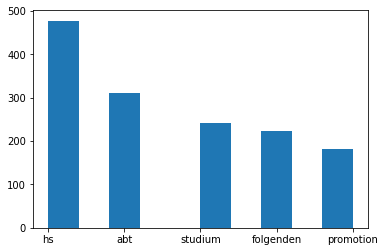

In [37]:
from matplotlib.pyplot import hist

hist(new_df[0:5].Word, weights=new_df[0:5].Frequency)

In [38]:
#Calculating Document Frequency

from collections import defaultdict
import math

DF = {}
for i in range(len(data['clean_text_wo_sw'])):
    tokens = nltk.word_tokenize(data['clean_text_wo_sw'][i]) #without nltk.word_tokenize, it gives character level DF
    for w in tokens:
            try:
                DF[w].add(i)
            except:
                DF[w] = {i}

In [39]:
#way of thresholding 

In [40]:
DF.keys()

dict_keys(['hochschule', 'dezember', 'promotion', 'registriert', 'ebenfalls', 'interesse', 'promotionsbedingungen', 'promovierenden', 'erfahren', 'doppelbefragungen', 'vermeiden', 'innerhalb', 'fragebogens', 'angegebenen', 'antworten', 'zweck', 'qualitätssicherung', 'evaluation', 'bereich', 'doktorandenausbildung', 'einverständnis', 'vorausgesetzt', 'weitergabe', 'angaben', 'einverstanden', 'anfang', 'offiziell', 'doktorand', 'zwischenzeit', 'geändert', 'aktuell', 'zutrifft', 'promoviere', 'promotionsverfahren', 'abgeschlossen', 'promotionsvorhaben', 'unterbrochen', 'abgebrochen', 'handelt', 'gemeldete', 'unterbrechung', 'erinnern', 'quartal', 'arbeiten', 'begonnen', 'zugelassen', 'informiert', 'ausland', 'beteiligt', 'gemeinsamen', 'abschluss', 'hochschulen', 'cotutelle', 'de', 'thèse', 'fachhochschule', 'angewandte', 'wissenschaften', 'letzten', 'universität', 'wissenschaftliche', 'beschäftigte', 'tätig', 'attraktiv', 'bewerten', 'arbeitgeberin', 'unattraktiv', 'sicht', 'einsparungen

In [41]:
len(DF) #Total Unique words

6395

In [42]:
len(data["Documents"])

19

In [43]:
for word,freq in DF.items():
    print(word,len(freq))

hochschule 18
dezember 3
promotion 14
registriert 2
ebenfalls 1
interesse 11
promotionsbedingungen 1
promovierenden 3
erfahren 5
doppelbefragungen 1
vermeiden 4
innerhalb 10
fragebogens 1
angegebenen 4
antworten 3
zweck 3
qualitätssicherung 1
evaluation 2
bereich 4
doktorandenausbildung 2
einverständnis 2
vorausgesetzt 1
weitergabe 1
angaben 7
einverstanden 1
anfang 4
offiziell 3
doktorand 3
zwischenzeit 1
geändert 1
aktuell 9
zutrifft 3
promoviere 6
promotionsverfahren 1
abgeschlossen 17
promotionsvorhaben 1
unterbrochen 9
abgebrochen 10
handelt 9
gemeldete 1
unterbrechung 2
erinnern 1
quartal 1
arbeiten 15
begonnen 14
zugelassen 1
informiert 3
ausland 15
beteiligt 3
gemeinsamen 6
abschluss 15
hochschulen 11
cotutelle 1
de 2
thèse 1
fachhochschule 10
angewandte 2
wissenschaften 4
letzten 17
universität 12
wissenschaftliche 14
beschäftigte 1
tätig 13
attraktiv 1
bewerten 5
arbeitgeberin 1
unattraktiv 1
sicht 5
einsparungen 1
vorgenommen 1
veränderungen 3
führten 1
beurteilen 8
negativ 

notwendig 5
beweisen 1
schaffe 2
selbstbild 1
entspricht 8
spaß 4
forschen 2
schlechtes 2
gewissen 1
täte 1
bessere 10
eröffnet 2
verdiene 2
spannend 1
finde 2
motiviert 3
fortzuführen 3
beitrag 6
jüngsten 1
kooperativen 1
verglichen 2
team 4
entwickeln 7
forschungsideen 1
konzipieren 1
analysetools 1
auswertungsstrategien 1
interpretieren 1
ergebnissen 1
verschriftlichen 1
koautor 2
erachten 1
auslandsaufenthalte 7
nützlich 2
hinblick 3
aspekte 10
fremdsprachenkenntnisse 4
kooperationen 2
deutschlands 5
einzugehen 1
attraktiven 1
einkommenschancen 3
forschungskompetenzen 1
internationalen 7
ausländischen 4
fördermitteln 1
voranzubringen 1
üblichen 2
anforderungen 5
hinderlich 1
durchführung 6
auslandsaufenthalts 4
kulturelle 6
motivation 3
fehlende 4
beratungs 3
unterstützungsangebote 1
kontaktverlust 1
netzwerk 4
passende 2
position 12
trennung 7
kind 10
freund 2
mobilität 1
geringer 4
persönlicher 3
nutzen 8
stimmen 5
erwerbstätige 1
kleinkind 1
normalerweise 3
genauso 3
inniges 1
v

einzubrechen 1
rechtliche 1
mög 1
lichkeit 1
hen 1
folgen 4
reichen 1
trau 1
ensbruch 1
aufzudecken 1
augen 2
kleinere 2
übel 2
wählten 1
zusam 1
menleben 1
schen 1
gefährdet 1
wären 1
han 1
deln 1
wür 1
falsch 1
grundlegendes 1
tum 1
letzen 1
solange 1
allge 1
gültigen 1
maß 2
stäbe 1
verhal 1
ten 1
selbstjustiz 1
scheiden 1
unüberlegt 1
wurf 1
riskieren 1
hinreichend 1
rechtlichen 1
ausge 1
schöpft 1
bruch 1
eilig 1
erhe 1
bliche 1
rechtsver 1
let 1
zung 1
begangen 1
stiehlt 1
einbricht 1
anstän 1
diger 1
ehrlicher 1
gelten 2
entlassung 1
betroffen 3
halb 1
bestand 3
abschriften 1
steh 1
len 1
arztes 1
halte 2
ge 1
fer 1
tigte 1
ausnahme 1
morali 1
pflich 1
tung 1
erhal 1
einzige 1
willen 1
konn 1
gebot 1
getan 1
wozu 1
überredete 1
brauchte 1
angenehme 1
kon 1
sequenzen 1
ohnehin 1
gestorben 1
mühe 1
größere 1
dosis 1
schmerz 1
mittels 1
abreichen 1
gesetz 1
verletzt 1
gerettet 1
schmerzen 1
verkürzen 1
vermutlich 3
kol 1
legen 2
ähnli 1
chen 1
situ 1
ation 1
gehandelt 1
überzeu 1
g

erfolgte 1
lehrgängen 1
stattfinden 1
informelles 1
lernformen 1
hinzuzulernen 1
besuch 5
fachvorträgen 1
fachkongressen 1
fachmessen 1
supervision 1
learning 1
selbstlernprogramm 1
lernangebote 1
selbstlernen 1
ausprobieren 1
vorgesetzten 2
dergleichen 1
organisatorischen 1
berufsbegleitende 1
vollzeitkurse 1
mehrtägige 1
tages 2
halbtagsveranstaltungen 1
wöchentlich 1
abendkurse 1
fernkurse 1
telelearning 1
spielen 3
aussteigen 1
prinzipiell 2
fehlt 3
lebe 1
fernbeziehung 1
finanziellen 3
voraussetzungen 2
müsste 1
aufgeben 1
passt 2
lebensstil 1
unerfüllt 1
geblieben 1
übernehmen 2
angemessene 2
zukunftsperspektiven 1
beschäftigungssicherheit 1
entwicklungsmöglichkeiten 1
letzte 6
grundlagenwissen 1
veränderte 1
umstände 1
ausdrucksfähigkeit 1
mündliche 3
schließen 2
vorhandenes 1
anzuwenden 1
selbständiges 1
analytische 1
auswirkungen 1
entsprechende 7
trafen 1
arbeitsplatzes 1
aufstiegschancen 1
auslaufen 2
befristeten 6
werkvertrages 1
entsprach 1
nähe 6
vorherige 2
übergangslösu

tadschikistan 2
tansania 2
thailand 2
togo 2
tonga 2
transnistrien 1
trinidad 2
tobago 2
tschad 2
tschechien 1
tunesien 2
türkei 1
turkmenistan 1
tuvalu 2
uganda 2
ukraine 2
ungarn 2
uruguay 2
usbekistan 2
vanuatu 2
vatikanstadt 2
venezuela 2
vereinigte 2
arabische 2
emirate 2
staaten 1
vereinigtes 1
königreich 1
vietnam 2
weißrussland 1
westsahara 1
zentralafrikanische 1
zypern 2
zusammenlebend 1
dauernd 1
getrennt 1
lebend 1
aufgehoben 1
lebenspartner 1
verstorben 2
datennutzung 1
einwilligung 1
willige 1
beschriebene 1
freiwilliger 2
vertragsverlängerung 1
vertrags 1
beziehe 1
wesentlichen 1
auftragsforschung 1
passendes 2
förderangebot 1
ablehnungsrisiko 1
antragsaufwand 1
chef 1
chefin 1
antragstellung 1
herausgeber 1
herausgeberin 1
zeitschrift 1
verlangt 1
koautoren 1
koautorinnen 1
rechtfertigt 1
selbstverständlich 1
honorieren 1
eingabeform 1
existiert 1
manuskript 1
vorlage 1
abschnitt 1
enthalten 4
promotionsform 1
kumulativ 1
monographie 1
fertigstellung 2
regelmäßiger 2
be

aequatorialguinea 1
aegypten 1
zentralafrik 1
helena 1
einschl 3
ascens 1
afrikan 1
kontinent 1
guayana 1
winward 1
inseln 1
surinam 1
windward 1
usa 1
niederl 1
antillen 1
brit 1
jungferninseln 1
amerika 1
birma 1
darussalam 1
ceylon 1
demokr 1
vr 1
islamische 1
laotische 1
volksrep 1
kirgisien 1
rep 1
philipinen 1
chin 1
sued 1
arab 1
turkmenien 1
republ 1
tibet 1
hongkong 1
asi 1
macau 1
palae 1
noerdl 1
marianen 1
ozeanien 1
westsamoa 1
marshall 1
pitcairn 1
staatenlos 1
ungeklaert 1
weltweit 1
kommunikationsassistenzen 1
vollzeiterwerbstätig 1
teilzeiterwerbstätig 1
kurzarbeit 1
rentner 1
pensionär 1
vaters 1
facharbeiterabschluss 2
lehrerausbildung 1
ordnen 1
ausgeübten 1
nachfolgend 4
spektrum 2
kolonnenführer 1
brigadier 1
kontorist 1
datentypist 1
kassierer 1
bürobote 1
botin 1
pfleger 1
vorstands 1
chefarzt 1
beamter 1
richter 1
berufssoldat 1
oberamtsgehilfe 1
gehilfin 1
hauptsekretär 1
amtsinspektor 1
oberamtsrat 1
grundschullehrer 1
leutnant 1
realschullehrer 1
anwältin 1


ernährungsgewohnheiten 1
koche 1
gelegenheit 1
schmeckt 1
ange 1
nehmes 1
warteschlangen 1
mensanutzung 1
prüfungsphase 1
klausur 1
absolviere 1
praxissemester 1
abschlussarbeit 1
urlaussemester 1
chronischer 2
leistungsbezogener 1
bedarf 1
konzentrationsschwierigkeiten 2
selbstwertgefühl 2
depressive 2
verstimmungen 2
alkohol 2
drogen 2
themenbereiche 1
problembereiche 1
fünfstellige 1
postleitzahl 1
ortes 1
erhalt 1
gelebt 2
themenbereich 1
themenbereichen 2
studentenwerks 1
hochschulbereichs 1
bar 2
konto 2
kindergeld 1
ausbildungsvergütung 1
ausbildungsbetriebes 1
ausbildungsinstitution 1
gleichgültig 2
unverzinsliches 2
bundesverwaltungsamt 2
ausgezahlt 2
wochenende 2
kleidung 2
kleidungsgeschenke 2
durchschnittswert 2
kraftfahrzeug 1
kitagebühren 1
schulgeld 1
kinderbezogene 1
drogerieartikel 1
spielzeug 1
abzahlung 1
kredite 1
studiendarlehen 1
wehr 2
zivil 1
bundesfreiwilligendienst 1
reise 1
work 2
travel 2
working 1
holiday 1
ökologische 1
freiwilligendienst 1
name 2
ortsanga

In [44]:
df_list=[]
for word,freq in DF.items():
    df_list.append(tuple((word,len(freq)/19)))

In [45]:
df_list.sort(key=lambda x:x[1])

In [46]:
df_list

[('ebenfalls', 0.05263157894736842),
 ('promotionsbedingungen', 0.05263157894736842),
 ('doppelbefragungen', 0.05263157894736842),
 ('fragebogens', 0.05263157894736842),
 ('qualitätssicherung', 0.05263157894736842),
 ('vorausgesetzt', 0.05263157894736842),
 ('weitergabe', 0.05263157894736842),
 ('einverstanden', 0.05263157894736842),
 ('zwischenzeit', 0.05263157894736842),
 ('geändert', 0.05263157894736842),
 ('promotionsverfahren', 0.05263157894736842),
 ('promotionsvorhaben', 0.05263157894736842),
 ('gemeldete', 0.05263157894736842),
 ('erinnern', 0.05263157894736842),
 ('quartal', 0.05263157894736842),
 ('zugelassen', 0.05263157894736842),
 ('cotutelle', 0.05263157894736842),
 ('thèse', 0.05263157894736842),
 ('beschäftigte', 0.05263157894736842),
 ('attraktiv', 0.05263157894736842),
 ('arbeitgeberin', 0.05263157894736842),
 ('unattraktiv', 0.05263157894736842),
 ('einsparungen', 0.05263157894736842),
 ('vorgenommen', 0.05263157894736842),
 ('führten', 0.05263157894736842),
 ('struk

In [47]:
check = [x[1] for x in df_list]

In [48]:
from collections import Counter
df_analysis = pd.DataFrame.from_dict(Counter(check), orient='index').reset_index()

In [49]:
df_analysis

,index,0
0,0.052632,3899
1,0.105263,1180
2,0.157895,461
3,0.210526,236
4,0.263158,211
5,0.315789,119
6,0.368421,75
7,0.421053,55
8,0.473684,38
9,0.526316,33


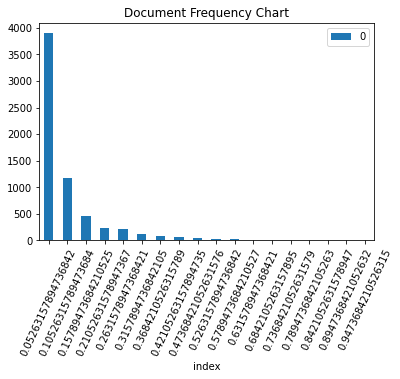

In [50]:
import matplotlib.pyplot as plot
# Draw a vertical bar chart

df_analysis.plot.bar(x="index", y=0, rot=65, title="Document Frequency Chart");

plot.show(block=True);

In [51]:
sample_data_w_lemma[0]

'Hochschule Dezember Promotion registrieren Interesse Promotionsbedingung Promovierenden erfahren Doppelbefragung vermeiden Fragebogen angegeben Antwort Hochschule Zweck Qualitätssicherung Evaluation Bereich Doktorandenausbildung Einverständnis voraussetzen geben Weitergabe Angabe Hochschule neinen Weitergabe Angabe Hochschule Anfang Dezember Hochschule Doktorand Zwischenzeit ändern Bitte geben zutreffen promovieren Promotionsverfahren abschließen Promotionsvorhaben unterbrechen Promotionsvorhaben abbrechen handeln Hochschule gemeldet Unterbrechung Ja erinnern welch Quartal Arbeit beginnen erinnern welch Quartal zulassen Quartal Quartal Quartal Quartal Hochschule informieren Promotion abbrechen erinnern welch Quartal Promotion abbrechen Quartal Quartal Quartal Quartal Promotionsverfahren Hochschule Ausland beteiligen Ja handeln gemeinsam Abschluss Hochschule In Ausland Ja Promotionsverfahren Fachhochschule Hochschule angewandt Wissenschaft beteiligen letzter Jahr Universität wissenscha

In [52]:
# train_set = sample_data_w_lemma[0:15]

In [53]:
# len(train_set)

In [54]:
from sklearn.feature_extraction.text import CountVectorizer 

cv=CountVectorizer(stop_words=stop_words,ngram_range=(1,1), min_df=0.05263) # trying different things

word_count_vector=cv.fit_transform(sample_data_w_lemma) #training  ,  #model.fit

/home/pawan/.local/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ernst', 'ordnung', 'schluss'] not in stop_words.
  % sorted(inconsistent)


In [55]:
#the numbers are not counts, they are the position in the sparse vector.
cv.vocabulary_

{'hochschule': 1792,
 'dezember': 858,
 'promotion': 2699,
 'registrieren': 2850,
 'interesse': 1892,
 'promotionsbedingung': 2704,
 'promovierenden': 2732,
 'erfahren': 1099,
 'doppelbefragung': 901,
 'vermeiden': 3555,
 'fragebogen': 1438,
 'angegeben': 131,
 'antwort': 192,
 'zweck': 3946,
 'qualitätssicherung': 2794,
 'evaluation': 1201,
 'bereich': 563,
 'doktorandenausbildung': 893,
 'einverständnis': 1017,
 'voraussetzen': 3662,
 'weitergabe': 3738,
 'angabe': 126,
 'neinen': 2482,
 'anfang': 117,
 'doktorand': 891,
 'zwischenzeit': 3959,
 'ändern': 3966,
 'zutreffen': 3932,
 'promovieren': 2729,
 'promotionsverfahren': 2723,
 'abschließen': 29,
 'promotionsvorhaben': 2724,
 'unterbrechen': 3431,
 'abbrechen': 1,
 'handeln': 1715,
 'gemeldet': 1576,
 'unterbrechung': 3432,
 'erinnern': 1130,
 'welch': 3744,
 'quartal': 2798,
 'arbeit': 204,
 'beginnen': 510,
 'zulassen': 3898,
 'informieren': 1860,
 'ausland': 366,
 'beteiligen': 665,
 'gemeinsam': 1573,
 'abschluss': 31,
 'fach

In [56]:
word_count_vector.shape
#We have 19 (rows) documents and 6001 unique words (columns)!
# With stopwords

(19, 4010)

In [57]:
cv.stop_words_ #gives you the stop words that CountVectorizer inferred from your min_df and max_df settings as well as those that were cut off during feature selection (through the use of max_features)

set()

In [58]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)

tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [59]:
feature_names=cv.get_feature_names()

/home/pawan/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [60]:
feature_names

['aal',
 'abbrechen',
 'abbruch',
 'abendessen',
 'abendgymnasium',
 'abendkurs',
 'abfallwirtschaft',
 'abfassen',
 'abfassung',
 'abfragen',
 'abgabe',
 'abgeben',
 'abgebrochen',
 'abgelehnt',
 'abgelehnter',
 'abgeschlossen',
 'abgestimmt',
 'abitur',
 'ablauf',
 'ablegen',
 'ablehnen',
 'ablehnung',
 'ablehnungsrisiko',
 'abmeldung',
 'abneigung',
 'abreichen',
 'abrufen',
 'absagen',
 'abschaffung',
 'abschließen',
 'abschließend',
 'abschluss',
 'abschlussarbeit',
 'abschlusses',
 'abschlussexamen',
 'abschlussniveau',
 'abschlussnote',
 'abschlussphase',
 'abschlussprüfung',
 'abschlusszeugnis',
 'abschluß',
 'abschneiden',
 'abschnitt',
 'abschrecken',
 'abschrift',
 'absehen',
 'absicht',
 'absolvieren',
 'abstandsgebot',
 'abstieg',
 'abstimmen',
 'abstimmung',
 'abt',
 'abteilung',
 'abteilungsleiter',
 'abteilungsleiterin',
 'abwehr',
 'abzahlung',
 'abzufassen',
 'abzug',
 'acknowledgments',
 'administration',
 'adresse',
 'aegypten',
 'agentur',
 'agrar',
 'ags',
 'ak',


In [61]:
# def sort_coo(coo_matrix):
#     tuples = zip(coo_matrix.col, coo_matrix.data)
#     return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

# def extract_topn_from_vector(feature_names, sorted_items, topn):
#     """get the feature names and tf-idf score of top n items"""
    
#     #use only topn items from vector
#     sorted_items = sorted_items[:topn]

#     score_vals = []
#     feature_vals = []
    
#     # word index and corresponding tf-idf score
#     for idx, score in sorted_items:
        
#         #keep track of feature name and its corresponding score
#         score_vals.append(round(score, 3))
#         feature_vals.append(feature_names[idx])

#     #create a tuples of feature,score
#     #results = zip(feature_vals,score_vals)
#     results= {}
#     for idx in range(len(feature_vals)):
#         results[feature_vals[idx]]=score_vals[idx]
    
#     return results

# def get_keywords(vectorizer, feature_names, doc):
#     """Return top k keywords from a doc using TF-IDF method"""

#     #generate tf-idf for the given document
#     tf_idf_vector = vectorizer.transform(cv.transform([doc]))
    
#     #sort the tf-idf vectors by descending order of scores
#     sorted_items=sort_coo(tf_idf_vector.tocoo())

#     #extract only TOP_K_KEYWORDS
#     keywords=extract_topn_from_vector(feature_names,sorted_items,200)
    
#     return (keywords)


In [62]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

def get_keywords(vectorizer, feature_names, doc):
    """Return top k keywords from a doc using TF-IDF method"""

    #generate tf-idf for the given document
    tf_idf_vector = vectorizer.transform(cv.transform([doc]))
    
    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only TOP_K_KEYWORDS
    keywords=extract_topn_from_vector(feature_names,sorted_items)
    
    return (keywords)


In [63]:
result = []
for doc in sample_data_w_lemma:
    df = {}
    df['Text'] = doc
    df['top_keywords'] = get_keywords(tfidf_transformer, feature_names, doc)
    result.append(df)
    
final = pd.DataFrame(result)
final

,Text,top_keywords
0,Hochschule Dezember Promotion registrieren Int...,"{'promotion': 0.392, 'betreuer': 0.201, 'thema..."
1,studienvorbereitend Kurs verlaufen Kurs beende...,"{'kurs': 0.493, 'vorbereitungskurs': 0.301, 'a..."
2,Studienabschluss letzter Studium Sommersemeste...,"{'masterstudium': 0.596, 'studium': 0.306, 'ma..."
3,Art Hochschule studieren Universität technisch...,"{'lehnen': 0.376, 'akzeptieren': 0.343, 'studi..."
4,derzeitig Tätigkeit Situation bezeichnen kurzf...,"{'mitarbeiter': 0.309, 'weiterbildung': 0.241,..."
5,Ware letzter Befragung Form Bitte geben Hilfe ...,"{'letzter': 0.306, 'beruflich': 0.25, 'tätigke..."
6,bisherig Bildungs Berufsweg bewerten Entscheid...,"{'studium': 0.454, 'aufnehmen': 0.215, 'berufl..."
7,Sprache Befragung durchführen nennen derzeitig...,"{'kollege': 0.241, 'wissenschaftlerinnen': 0.1..."
8,Ware letzter Befragung Form Bitte geben Hilfe ...,"{'weiterbildung': 0.29, 'ausland': 0.282, 'let..."
9,Abschluss streben derzeitig Studiengang Bachel...,"{'hs': 0.718, 'abt': 0.664, 'kuenste': 0.061, ..."


In [142]:
len(final['top_keywords'][12])

524

In [65]:
(list(final['top_keywords'][0].keys()))

['promotion',
 'betreuer',
 'thema',
 'fakultät',
 'sonstige',
 'quartal',
 'aussage',
 'folgend',
 'wissenschaft',
 'forschungs',
 'wissenschaftlich',
 'hochschule',
 'außerakademisch',
 'vertrag',
 'treffen',
 'beratung',
 'verfassen',
 'selbstständigkeit',
 'promotionsprogramm',
 'stelle',
 'bereich',
 'entscheidungsprozess',
 'betreuen',
 'eltern',
 'bezug',
 'tätigkeit',
 'teilnehmen',
 'sonstig',
 'partner',
 'entwicklungsbezug',
 'empfinden',
 'promotionsverfahren',
 'mitgliedschaft',
 'karriereentwicklung',
 'durchlaufen',
 'auswahlverfahren',
 'programm',
 'forschungseinrichtung',
 'arbeit',
 'beruflich',
 'karriere',
 'staatsangehörigkeit',
 'kurs',
 'promotionsvorhaben',
 'wettbewerblich',
 'qualifizierungsziel',
 'promotionsprojekt',
 'lehrveranstaltungsprogramm',
 'graduiertenakademie',
 'fachdisziplin',
 'ausschreibung',
 'person',
 'betreuung',
 'verhalten',
 'universität',
 'beratungs',
 'verbindlich',
 'thematisch',
 'promovierende',
 'vollzeit',
 'stand',
 'freiberufl

In [66]:
#final.to_csv("Questionnaire_check.csv")

In [67]:
#for uniqueness

In [68]:
# #Calculating Document Frequency

# from collections import defaultdict
# import math

# DF2 = {}
# for i in range(len(final)):
#     for elem in list((final['top_keywords'])[i].keys()):
#         tokens = nltk.word_tokenize(elem) #without nltk.word_tokenize, it gives character level DF
#         for w in tokens:
#             try:
#                 DF2[w].add(i)
#             except:
#                 DF2[w] = {i}

In [69]:
# DF2

In [70]:
# len(DF2)

In [71]:
# for word,freq in DF2.items():
#     print(word,len(freq))

In [72]:
# df_list1=[]
# for word,freq in DF2.items():
#     df_list1.append(tuple((word,len(freq)/19)))

In [73]:
# df_list1

In [74]:
# for uniquenees we can take the amount(count/Frequency) of documents that a keyword occurs in and then dividing it by the total amount of documents.(Document frequency)

# something that comes in 19 out of 19 questionnaire, we can be sure that it is not unique and something that comes in 1 out of 19 it’s very unique.

# we can define a threshold on document frquency and based on that can define the uniqueness/decisiveness of keyword
# for i in range(len(final)):
#     for elem in list((final['top_keywords'])[i].keys()):
        

In [75]:
type(final['top_keywords'])

pandas.core.series.Series

In [76]:
final['Ground_Truth']= data['Ground_Truth'] 

In [77]:
final

,Text,top_keywords,Ground_Truth
0,Hochschule Dezember Promotion registrieren Int...,"{'promotion': 0.392, 'betreuer': 0.201, 'thema...","'wissenschaftssystem', 'betreuung', 'wissensch..."
1,studienvorbereitend Kurs verlaufen Kurs beende...,"{'kurs': 0.493, 'vorbereitungskurs': 0.301, 'a...","'integration', 'geflüchtete', 'studienkolleg',..."
2,Studienabschluss letzter Studium Sommersemeste...,"{'masterstudium': 0.596, 'studium': 0.306, 'ma...","'beruflicher verbleib von exmatrikulierten', '..."
3,Art Hochschule studieren Universität technisch...,"{'lehnen': 0.376, 'akzeptieren': 0.343, 'studi...","'evaluation', 'qualifikation', 'effizienz', 's..."
4,derzeitig Tätigkeit Situation bezeichnen kurzf...,"{'mitarbeiter': 0.309, 'weiterbildung': 0.241,...",'hochschulforschung'
5,Ware letzter Befragung Form Bitte geben Hilfe ...,"{'letzter': 0.306, 'beruflich': 0.25, 'tätigke...","'promotion', 'hochschulforschung', 'promotion'..."
6,bisherig Bildungs Berufsweg bewerten Entscheid...,"{'studium': 0.454, 'aufnehmen': 0.215, 'berufl...","'studienberechtigte', 'hochschulforschung'"
7,Sprache Befragung durchführen nennen derzeitig...,"{'kollege': 0.241, 'wissenschaftlerinnen': 0.1...",'hochschulforschung'
8,Ware letzter Befragung Form Bitte geben Hilfe ...,"{'weiterbildung': 0.29, 'ausland': 0.282, 'let...","'promotion', 'hochschulforschung', 'promotion'..."
9,Abschluss streben derzeitig Studiengang Bachel...,"{'hs': 0.718, 'abt': 0.664, 'kuenste': 0.061, ...",'hochschulforschung'


In [78]:
# final.to_csv("keywords_After_POS.csv")

In [79]:
list(final['top_keywords'][4].keys())

['mitarbeiter',
 'weiterbildung',
 'initiative',
 'dienststelle',
 'tätigkeit',
 'beruflich',
 'weiterbildungen',
 'teilnahmekosten',
 'kostenübernahme',
 'zuwendung',
 'rücklage',
 'eigenmitteln',
 'anfallen',
 'agentur',
 'arbeit',
 'teilnahme',
 'arbeitgeber',
 'stipendien',
 'folgend',
 'sonstig',
 'erfolgen',
 'kurs',
 'betrieb',
 'kredit',
 'darlehen',
 'ausüben',
 'öffentlich',
 'teilnehmen',
 'hilfe',
 'finanzierung',
 'finanzieren',
 'erweitern',
 'wissenschaftlich',
 'arbeitsplatz',
 'fähigkeit',
 'beschäftigung',
 'schulung',
 'misserfolg',
 'interessanter',
 'höher',
 'arbeitsumgebung',
 'kind',
 'sonstige',
 'hochschulabschluss',
 'fort',
 'hochschule',
 'arbeiten',
 'studienabschluss',
 'erreichen',
 'seminar',
 'firma',
 'arbeitsbedingung',
 'mehrwöchig',
 'gehaltsbestandteil',
 'bildungsangebot',
 'kenntnis',
 'erwerbstätigkeit',
 'fachlich',
 'längerfristig',
 'ziel',
 'kolleg',
 'grund',
 'möglichkeit',
 'derzeitig',
 'studium',
 'unternehmen',
 'dienstleistung',
 'üb

In [80]:
# predicted=[]
# chunk_size = 1 #coz max ground truth size is 20
# for i in range(len(final['top_keywords'])):
#     predicted.append([])           #used for nested list
#     for j in range(1,int(200/chunk_size)+1): # if we take top 200
#         predicted[i].append(list(final['top_keywords'][i].keys())[0:j*chunk_size])

In [81]:
predicted=[]
chunk_size = 1 #coz max ground truth size is 20
for i in range(len(final['top_keywords'])):
    predicted.append([])           #used for nested list
    for j in range(1,int(len(final['top_keywords'][i])/chunk_size)+1):
        predicted[i].append(list(final['top_keywords'][i].keys())[0:j*chunk_size])

In [82]:
len(predicted[0][-1])

903

In [83]:
len(predicted[0])

903

In [84]:
check = list(final['Ground_Truth'])

In [85]:
ground_truth =[]
for i in range(len(check)):
    ground_truth.append([check[i]])

In [86]:
ground_truth

[["'wissenschaftssystem', 'betreuung', 'wissenschaftliche karriere', 'promotionsformen', 'promotionsmotive', 'vereinbarkeit von familie und beruf', 'monetäre erträge', 'nicht-monetäre erträge', 'wissenschaftlicher nachwuchs', 'promotionsabbruch', 'promovierende', 'promotion', 'strukturierte promotion', 'persönlichkeit', 'finanzierung', 'mobilität', 'gesundheit', 'erwerbsverläufe', 'arbeitsmarkterfolg innerhalb und außerhalb der wissenschaft', 'promovierte'"],
 ["'integration', 'geflüchtete', 'studienkolleg', 'migration', 'studienvorbereitung'"],
 ["'beruflicher verbleib von exmatrikulierten', 'studiensituation', 'studienabbruch', 'masterstudium', 'abbruchursachen'"],
 ["'evaluation', 'qualifikation', 'effizienz', 'studiensituation', 'zeitreihen', 'studierendenbefragung', 'hochschulforschung'"],
 ["'hochschulforschung'"],
 ["'promotion', 'hochschulforschung', 'promotion', 'promotionsbedingungen', 'promotionsbetreuung', 'promotionsfinanzierung', 'bildungsverlauf', 'berufsverlauf', 'besch

In [87]:
for i in range(len(ground_truth)):
    ground_truth[i]= ground_truth[i][0].split(",")

In [88]:
for words in ground_truth[14]:
    print(words)

'absolventen'
 'hochschulforschung'


In [89]:
for i in range(len(ground_truth)):
    for j in range(len(ground_truth[i])):
        ground_truth[i][j] = ground_truth[i][j].strip()

In [90]:
len(ground_truth[12])

15

In [91]:
len(ground_truth)

19

In [92]:
len(list(final['top_keywords']))

19

In [93]:
######################################################
# function to evaluate success of keyword extraction #
######################################################
def evaluate_keywords(proposed,only_keywords):
  """
  Returns precision, recall, and f1 score for proposed keywords against ground truth
  """
  proposed_set = set(proposed)
  true_set = set(only_keywords)
  
  true_positives = len(proposed_set.intersection(true_set))
  if len(proposed_set)==0:
    precision = 0
  else:
    # note denominator reflects total number of words
    # not total number of unique words
    precision = true_positives/float(len(proposed)) 
      
  if len(true_set)==0:
    recall = 0
  else:
    recall = true_positives/float(len(true_set))
  
  if precision + recall > 0:
    f1 = 2*precision*recall/float(precision + recall)
  else:
    f1 = 0

  return (precision, recall, f1)

In [94]:
eval_values = []
for i in range(len(predicted)):
    eval_values.append([]) 
    for j in range(len(predicted[i])):
        eval_values[i].append(evaluate_keywords(predicted[i][j], only_keywords[i]))

In [95]:
len(eval_values[0])

903

In [96]:
eval_values

[[(1.0, 0.14285714285714285, 0.25),
  (0.5, 0.14285714285714285, 0.22222222222222224),
  (0.3333333333333333, 0.14285714285714285, 0.2),
  (0.25, 0.14285714285714285, 0.18181818181818182),
  (0.2, 0.14285714285714285, 0.16666666666666666),
  (0.16666666666666666, 0.14285714285714285, 0.15384615384615383),
  (0.14285714285714285, 0.14285714285714285, 0.14285714285714285),
  (0.125, 0.14285714285714285, 0.13333333333333333),
  (0.1111111111111111, 0.14285714285714285, 0.125),
  (0.1, 0.14285714285714285, 0.11764705882352941),
  (0.09090909090909091, 0.14285714285714285, 0.1111111111111111),
  (0.08333333333333333, 0.14285714285714285, 0.10526315789473685),
  (0.07692307692307693, 0.14285714285714285, 0.1),
  (0.07142857142857142, 0.14285714285714285, 0.09523809523809523),
  (0.06666666666666667, 0.14285714285714285, 0.09090909090909091),
  (0.0625, 0.14285714285714285, 0.08695652173913043),
  (0.058823529411764705, 0.14285714285714285, 0.08333333333333333),
  (0.05555555555555555, 0.1428

In [97]:
precison_values = []
for i in range(len(eval_values)):
    precison_values.append([])
    for a_tuple in eval_values[i]:
        precison_values[i].append(a_tuple[0])

In [98]:
len(precison_values[0])

903

In [99]:
precison_values[0]

[1.0,
 0.5,
 0.3333333333333333,
 0.25,
 0.2,
 0.16666666666666666,
 0.14285714285714285,
 0.125,
 0.1111111111111111,
 0.1,
 0.09090909090909091,
 0.08333333333333333,
 0.07692307692307693,
 0.07142857142857142,
 0.06666666666666667,
 0.0625,
 0.058823529411764705,
 0.05555555555555555,
 0.05263157894736842,
 0.05,
 0.047619047619047616,
 0.045454545454545456,
 0.043478260869565216,
 0.041666666666666664,
 0.04,
 0.038461538461538464,
 0.037037037037037035,
 0.03571428571428571,
 0.034482758620689655,
 0.03333333333333333,
 0.03225806451612903,
 0.03125,
 0.030303030303030304,
 0.029411764705882353,
 0.02857142857142857,
 0.027777777777777776,
 0.02702702702702703,
 0.02631578947368421,
 0.02564102564102564,
 0.025,
 0.024390243902439025,
 0.023809523809523808,
 0.023255813953488372,
 0.022727272727272728,
 0.022222222222222223,
 0.021739130434782608,
 0.02127659574468085,
 0.020833333333333332,
 0.02040816326530612,
 0.02,
 0.0196078431372549,
 0.019230769230769232,
 0.03773584905660

In [100]:
recall_values = []
for i in range(len(eval_values)):
    recall_values.append([])
    for a_tuple in eval_values[i]:
        recall_values[i].append(a_tuple[1])

In [101]:
recall_values[0]

[0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.1428571

In [102]:
f1_score = []
for i in range(len(eval_values)):
    f1_score.append([])
    for a_tuple in eval_values[i]:
        f1_score[i].append(a_tuple[2])

In [135]:
recall_values[3]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333

Graph for document 0


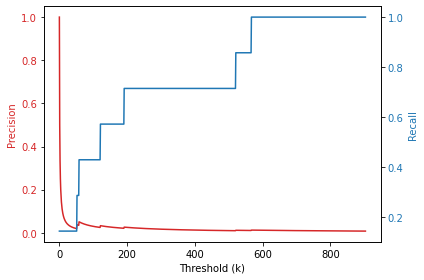

Graph for document 1


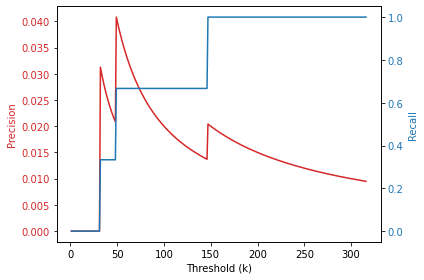

Graph for document 2


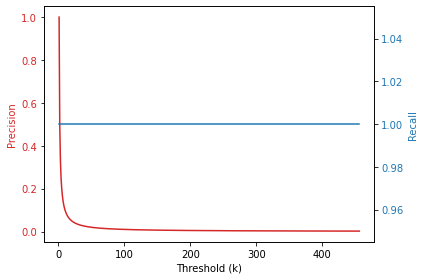

Graph for document 3


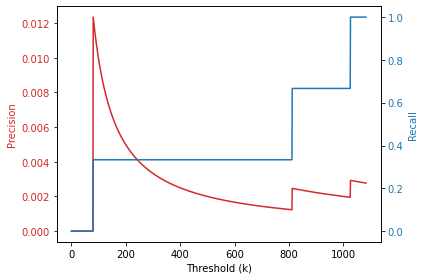

Graph for document 4


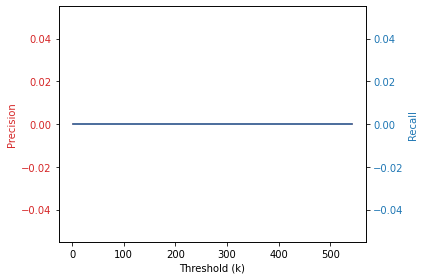

Graph for document 5


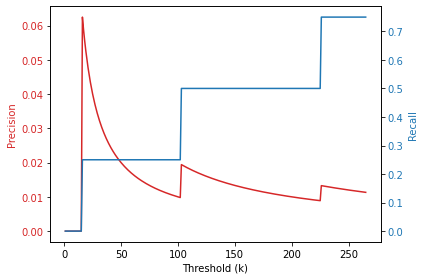

Graph for document 6


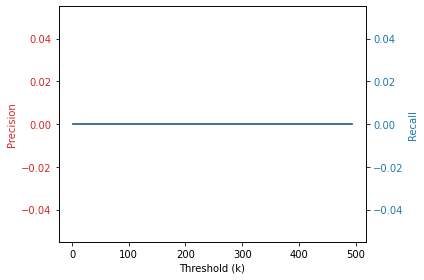

Graph for document 7


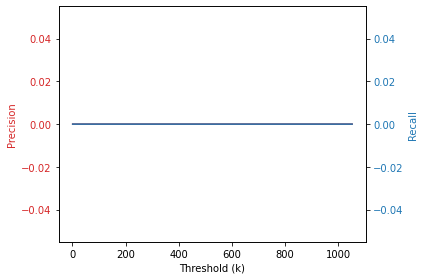

Graph for document 8


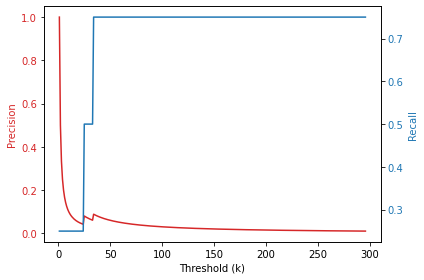

Graph for document 9


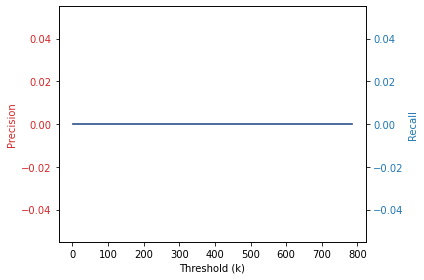

Graph for document 10


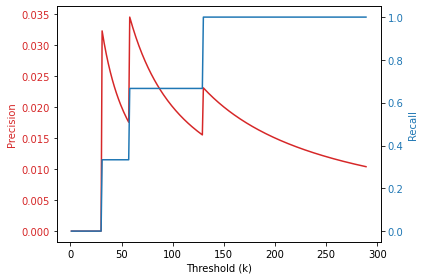

Graph for document 11


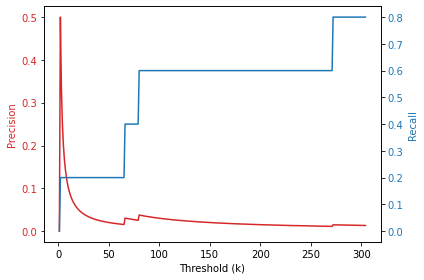

Graph for document 12


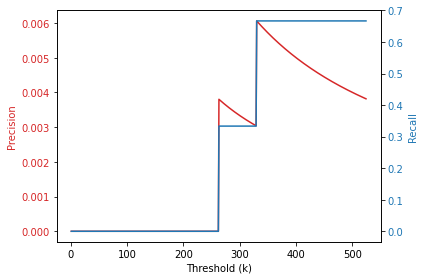

Graph for document 13


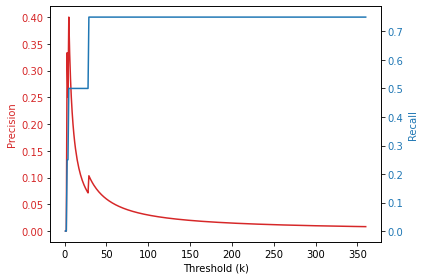

Graph for document 14


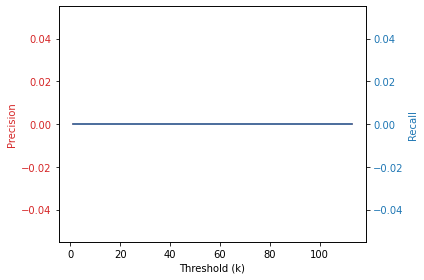

Graph for document 15


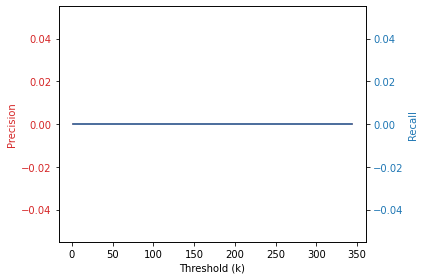

Graph for document 16


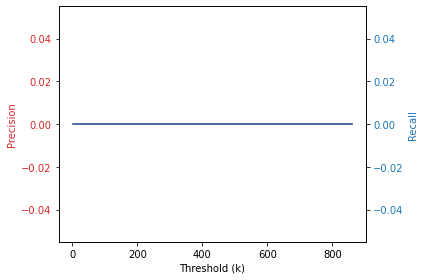

Graph for document 17


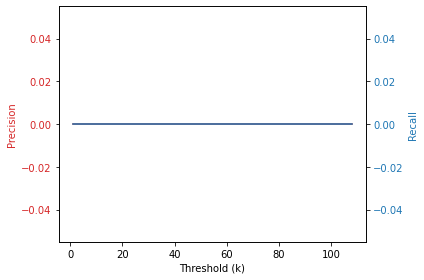

Graph for document 18


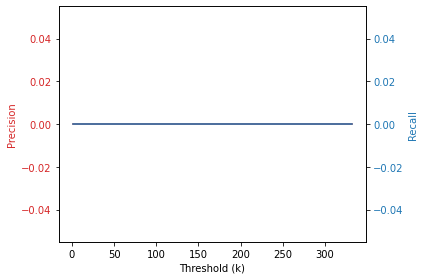

In [104]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


for i in range(len(precison_values)):
        print("Graph for document "+ str(i))
    
        # Create some mock data
        t = [x for x in range(1,(len(precison_values[i])+1))]
        data1 = precison_values[i]
        data2 = recall_values[i]

        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_xlabel('Threshold (k)')
        ax1.set_ylabel('Precision', color=color)
        ax1.plot(t, data1, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('Recall', color=color)  # we already handled the x-label with ax1
        ax2.plot(t, data2, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        fig.patch.set_visible(False)
#         plt.savefig(str(i) + 'Document.png',  dpi=200)  #to save the plots
        plt.show()
      

In [151]:
check_new = [elem for elem in list(final['top_keywords'][12])]
len(check_new)

524

In [150]:
only_keywords[12]

['wohnsituation', 'studiensituation', 'corona']

In [152]:
list(set(check_new).intersection(only_keywords[12]))

['wohnsituation', 'studiensituation']

In [109]:
best_recall_indices_new = []
for i in range(len(recall_values)):
    best_recall_indices_new.append(recall_values[i].index(max(recall_values[i])))

In [110]:
best_recall_indices_new

[566, 146, 0, 1025, 0, 225, 0, 0, 33, 0, 129, 271, 329, 28, 0, 0, 0, 0, 0]

In [145]:


F1_Scores= f1_score

best_F1 = []
for i in range(len(F1_Scores)):
    best_F1.append(f1_score[i].index(max(f1_score[i]))) 
    

In [146]:
best_F1

[0, 48, 0, 80, 0, 15, 0, 0, 0, 0, 57, 1, 329, 4, 0, 0, 0, 0, 0]

In [111]:
# from matplotlib import pyplot as plt
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.backends.backend_pdf import PdfPages


# for i in range(len(precison_values)):
#         print("Graph for document "+ str(i))
    
#         # Create some mock data
#         t = [x for x in range(1,201)]
#         data1 = precison_values[i]
#         data2 = recall_values[i]

#         fig, ax1 = plt.subplots()

#         color = 'tab:red'
#         ax1.set_xlabel('Threshold (k)')
#         ax1.set_ylabel('Precision', color=color)
#         ax1.plot(t, data1, color=color)
#         ax1.tick_params(axis='y', labelcolor=color)

#         ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#         color = 'tab:blue'
#         ax2.set_ylabel('Recall', color=color)  # we already handled the x-label with ax1
#         ax2.plot(t, data2, color=color)
#         ax2.tick_params(axis='y', labelcolor=color)

#         fig.tight_layout()  # otherwise the right y-label is slightly clipped
# #         plt.savefig(str(i) + 'Document.png',  dpi=200)  #to save the plots
#         plt.show()
      

In [112]:
# import matplotlib.pyplot as plt

# for i in range(len(f1_score)):
#     t = [x for x in range(1,201)]
#     data = f1_score[i]
# #     fig, ax1 = plt.subplots()

#     color = 'tab:red'
#     plt.xlabel("Threshold(k)")
#     plt.ylabel("F1-Score")
#     plt.plot(t, data, color=color)
#     plt.tick_params(axis='y', labelcolor=color)
#     plt.title("F1 Score graph")  #document "+ str(i)
#     plt.show()
    


In [113]:
# for every document : finding the location of best F1 score for first 15 document(top k for each doc)

F1_Scores= f1_score[0:15]   #extracting f1 scores from first 15 document

best_F1 = []
for i in range(len(F1_Scores)):
    best_F1.append(f1_score[i].index(max(f1_score[i]))) #gives location for best F1_score for each documents

In [114]:
best_F1

[0, 48, 0, 80, 0, 15, 0, 0, 0, 0, 57, 1, 329, 4, 0]

In [115]:
F1_Scores[0] # check value for the above indices

[0.25,
 0.22222222222222224,
 0.2,
 0.18181818181818182,
 0.16666666666666666,
 0.15384615384615383,
 0.14285714285714285,
 0.13333333333333333,
 0.125,
 0.11764705882352941,
 0.1111111111111111,
 0.10526315789473685,
 0.1,
 0.09523809523809523,
 0.09090909090909091,
 0.08695652173913043,
 0.08333333333333333,
 0.08,
 0.07692307692307693,
 0.07407407407407408,
 0.07142857142857142,
 0.06896551724137931,
 0.06666666666666667,
 0.06451612903225806,
 0.0625,
 0.060606060606060615,
 0.058823529411764705,
 0.05714285714285715,
 0.05555555555555555,
 0.05405405405405406,
 0.052631578947368425,
 0.05128205128205128,
 0.05,
 0.04878048780487805,
 0.04761904761904761,
 0.046511627906976744,
 0.045454545454545456,
 0.044444444444444446,
 0.043478260869565216,
 0.0425531914893617,
 0.04166666666666667,
 0.04081632653061224,
 0.04,
 0.0392156862745098,
 0.038461538461538464,
 0.03773584905660378,
 0.037037037037037035,
 0.03636363636363636,
 0.03571428571428571,
 0.03508771929824562,
 0.0344827586

In [116]:
final['top_keywords'][0]

{'promotion': 0.392,
 'betreuer': 0.201,
 'thema': 0.17,
 'fakultät': 0.126,
 'sonstige': 0.123,
 'quartal': 0.122,
 'aussage': 0.121,
 'folgend': 0.117,
 'wissenschaft': 0.116,
 'forschungs': 0.114,
 'wissenschaftlich': 0.113,
 'hochschule': 0.113,
 'außerakademisch': 0.111,
 'vertrag': 0.107,
 'treffen': 0.106,
 'beratung': 0.103,
 'verfassen': 0.097,
 'selbstständigkeit': 0.097,
 'promotionsprogramm': 0.096,
 'stelle': 0.091,
 'bereich': 0.09,
 'entscheidungsprozess': 0.088,
 'betreuen': 0.087,
 'eltern': 0.085,
 'bezug': 0.085,
 'tätigkeit': 0.081,
 'teilnehmen': 0.078,
 'sonstig': 0.078,
 'partner': 0.078,
 'entwicklungsbezug': 0.078,
 'empfinden': 0.078,
 'promotionsverfahren': 0.077,
 'mitgliedschaft': 0.077,
 'karriereentwicklung': 0.077,
 'durchlaufen': 0.077,
 'auswahlverfahren': 0.077,
 'programm': 0.074,
 'forschungseinrichtung': 0.072,
 'arbeit': 0.071,
 'beruflich': 0.07,
 'karriere': 0.07,
 'staatsangehörigkeit': 0.07,
 'kurs': 0.069,
 'promotionsvorhaben': 0.068,
 'wett

In [117]:
list(final['top_keywords'][0].values())[15]

0.103

In [118]:
best_F1

[0, 48, 0, 80, 0, 15, 0, 0, 0, 0, 57, 1, 329, 4, 0]

In [119]:
f1_score[0][15]

0.08695652173913043

In [120]:
list(final['top_keywords'][14].values())[0]

0.397

In [121]:
# for best F1 score location, find tf-idf extracted keyword score(TF-IDF value) corresponding to it, extract for every document value at best location
f1_score_tf_idf = []
for i in range(len(best_F1)):
    tf_idf_values = list(final['top_keywords'][i].values())
    f1_score_tf_idf.append(tf_idf_values[best_F1[i]])
    

In [122]:
f1_score_tf_idf

[0.392,
 0.048,
 0.596,
 0.04,
 0.309,
 0.119,
 0.454,
 0.241,
 0.29,
 0.718,
 0.062,
 0.275,
 0.018,
 0.189,
 0.397]

In [123]:
# Mean value of  f1_score_tf_idf

avearge_f1_score_tf_idf = sum(f1_score_tf_idf)/len(f1_score_tf_idf)
print("The average is ", round(avearge_f1_score_tf_idf,2))

The average is  0.28


In [124]:
#Testing on last 4 documents  , test set

test_set = sample_data_w_lemma[15:20]

In [125]:
len(test_set)

4

In [126]:
# # basically we are splitting .fit and .fit_transform and implementing them separaely to see the difference in our training and testing set
# count matrix 
count_vector=cv.transform(test_set) 
# tf-idf scores 
tf_idf_vector_test = tfidf_transformer.transform(count_vector) #model.predict , same number of unique words as train set.

In [127]:
tf_idf_vector_test.todense()

matrix([[0.        , 0.02976061, 0.02570067, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [128]:
tf_idf_vector_test

<4x4010 sparse matrix of type '<class 'numpy.float64'>'
	with 1645 stored elements in Compressed Sparse Row format>

In [129]:
list(get_keywords(tfidf_transformer, feature_names, test_set[1]).values())

[0.251,
 0.228,
 0.222,
 0.214,
 0.201,
 0.178,
 0.149,
 0.137,
 0.137,
 0.128,
 0.126,
 0.116,
 0.108,
 0.104,
 0.1,
 0.094,
 0.093,
 0.091,
 0.083,
 0.082,
 0.082,
 0.08,
 0.08,
 0.08,
 0.079,
 0.078,
 0.074,
 0.074,
 0.073,
 0.071,
 0.07,
 0.07,
 0.07,
 0.07,
 0.067,
 0.067,
 0.067,
 0.066,
 0.065,
 0.064,
 0.063,
 0.063,
 0.059,
 0.059,
 0.059,
 0.059,
 0.059,
 0.059,
 0.058,
 0.058,
 0.058,
 0.058,
 0.058,
 0.057,
 0.055,
 0.055,
 0.055,
 0.054,
 0.054,
 0.054,
 0.054,
 0.054,
 0.054,
 0.054,
 0.054,
 0.054,
 0.054,
 0.054,
 0.053,
 0.053,
 0.053,
 0.053,
 0.053,
 0.053,
 0.052,
 0.052,
 0.05,
 0.05,
 0.048,
 0.048,
 0.047,
 0.047,
 0.047,
 0.047,
 0.047,
 0.047,
 0.047,
 0.047,
 0.047,
 0.047,
 0.047,
 0.047,
 0.047,
 0.044,
 0.043,
 0.042,
 0.042,
 0.042,
 0.042,
 0.042,
 0.042,
 0.042,
 0.042,
 0.042,
 0.042,
 0.042,
 0.042,
 0.041,
 0.041,
 0.041,
 0.041,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.039,
 0.039,
 0.039,
 0.039,
 0.039,

In [130]:
result = []
for doc in test_set:
    df = {}
    df['Text'] = doc
    df['top_keywords'] = get_keywords(tfidf_transformer, feature_names, doc)
    result.append(df)
    
final2 = pd.DataFrame(result)
final2

,Text,top_keywords
0,Promotion beginnen abschließen abschließen Ver...,"{'promotion': 0.52, 'lehre': 0.25, 'forschung'..."
1,Sommersemester BAföG fördern Antrag stellen ak...,"{'studium': 0.251, 'tätigkeit': 0.228, 'ausgab..."
2,weit Wohnung leben Denken Zweit Nebenwohnung J...,"{'wohnung': 0.503, 'zweit': 0.232, 'nebenwohnu..."
3,angestrebt Abschluss erworben Abschluss Art Ma...,"{'eltern': 0.247, 'vorlesungsfrei': 0.243, 'st..."


In [143]:
final2['top_keywords'][0]

{'promotion': 0.52,
 'lehre': 0.25,
 'forschung': 0.217,
 'tätigkeit': 0.163,
 'promotionsphase': 0.143,
 'fachlich': 0.142,
 'folgend': 0.138,
 'arbeit': 0.134,
 'tagungen': 0.132,
 'dienstaufgabe': 0.13,
 'dissertation': 0.103,
 'hoh': 0.098,
 'gremienarbeit': 0.098,
 'beschaffen': 0.098,
 'administration': 0.098,
 'fehlend': 0.094,
 'forschungs': 0.089,
 'forschungsaufenthalt': 0.086,
 'arbeitsalltag': 0.086,
 'thema': 0.083,
 'wissenschaftlich': 0.08,
 'akademisch': 0.079,
 'entfallen': 0.077,
 'betreuer': 0.077,
 'arbeitsmittel': 0.077,
 'rahmen': 0.074,
 'betreuung': 0.074,
 'beruflich': 0.072,
 'abschließen': 0.072,
 'forschungseinrichtung': 0.071,
 'tutorien': 0.071,
 'prozent': 0.071,
 'planen': 0.07,
 'lehrveranstaltung': 0.067,
 'verwaltung': 0.065,
 'seminar': 0.065,
 'dissertationsschrift': 0.065,
 'aufsatz': 0.065,
 'vereinbarung': 0.065,
 'forschungsteam': 0.065,
 'kontakt': 0.063,
 'sonstige': 0.063,
 'hochschule': 0.062,
 'zweifel': 0.061,
 'dauer': 0.061,
 'wissenscha

In [132]:
# new_list=[]
# for i in range(len(final)):
#     new_list.append([])
#     for elem in list((final['top_keywords'])[i].keys()):
#         print(elem)                                 # will print 3800 words(200*19)

In [133]:
#mapping candidate keywords with thesaurus 
thesaurus_data = pd.read_csv("Thesaurus.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Thesaurus.csv'

In [ ]:
thesaurus_data

In [ ]:
thesaurus_list=thesaurus_data.values.tolist()

In [ ]:
thesaurus_list

In [ ]:
#lowercase thesaurus words
new_thesaurus_list = []
for sublist in thesaurus_list:
    new_sublist = []
    for item in sublist:
        new_sublist.append(item.lower())
    new_thesaurus_list.append(new_sublist) 

In [ ]:
new_thesaurus_list

In [ ]:
#mapping keyword from tfidf with thesaurus 

new_list=[]
for i in range(len(final)):
#     print(i,flush=True)
    new_list.append([])
    for elem in list((final['top_keywords'])[i].keys()):
        temp = [tuple((index1,index2))for index1,value1 in enumerate(new_thesaurus_list) for index2,value2 in enumerate(value1) if value2==elem]
        if (len(temp))!=0:
            for elem1 in temp:
                if elem1[1]==0:
                    if new_thesaurus_list[elem1[0]][1] == '9999':
#                         print("a",i)
                        new_list[i].append(elem)
                    else:
                        new_list[i].append(tuple((elem,new_thesaurus_list[elem1[0]][1])))
                        
                elif elem1[1]==1:
                    new_list[i].append(elem)
                    

In [ ]:
new_list[18]

In [ ]:
final['Keywords_after_mapping'] = new_list

In [ ]:
final

In [ ]:
final['top_keywords'][0]

In [ ]:
len(final['top_keywords'][0])

In [ ]:
final['Keywords_after_mapping'][0]

In [ ]:
len(final['Keywords_after_mapping'][0])

In [ ]:
#final.to_csv("Questionnaire_check.csv")